In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as seabornInstance 
from sklearn import metrics

In [2]:
dataset = pd.read_csv('airlines.csv')

In [3]:
dataset.shape

(539383, 9)

In [4]:
dataset.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [5]:
print(dataset.Airline.unique())

['CO' 'US' 'AA' 'AS' 'DL' 'B6' 'HA' 'OO' '9E' 'OH' 'EV' 'XE' 'YV' 'UA'
 'MQ' 'FL' 'F9' 'WN']


In [6]:
labeling = preprocessing.LabelEncoder()

dataset['Airline'] = labeling.fit_transform(dataset['Airline'])
dataset['AirportFrom'] = labeling.fit_transform(dataset['AirportFrom'])
dataset['AirportTo'] = labeling.fit_transform(dataset['AirportTo'])

In [7]:
dataset

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,4,269,253,135,3,15,205,1
1,2,14,1558,217,60,3,15,222,1
2,3,1,2400,154,80,3,20,165,1
3,4,1,2466,253,80,3,20,195,1
4,5,2,108,14,252,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,4,178,203,264,5,1439,326,0
539379,539380,8,398,252,16,5,1439,305,0
539380,539381,8,609,253,184,5,1439,255,0
539381,539382,13,78,128,253,5,1439,313,1


In [8]:
# select features to be considered in clustering
    
x1 = dataset['Airline'].values
x2 = dataset['Flight'].values
x3 = dataset['AirportFrom'].values
x4 = dataset['AirportTo'].values
x5 = dataset['DayOfWeek'].values
x6 = dataset['Time'].values
x7= dataset['Length'].values
x8= dataset['Delay'].values

A = np.array(list(zip(x1,x2, x3, x4,x5,x6,x7,x8)))


In [9]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(A)
# Getting the cluster labels
labels = kmeans.predict(A)
# Centroid values
centroids = kmeans.cluster_centers_

labels = kmeans.labels_


C:\Users\klboy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
# Comparing with scikit-learn centroids

print(centroids) # From sci-kit learn

[[1.04454864e+01 6.08910813e+03 1.40649339e+02 1.40746868e+02
  3.92137191e+00 8.03061963e+02 9.57262000e+01 4.08069698e-01]
 [8.73838943e+00 8.36660761e+02 1.46777929e+02 1.46922375e+02
  3.91938635e+00 8.05376158e+02 1.52957245e+02 4.67737875e-01]
 [9.71480077e+00 3.02773898e+03 1.41527227e+02 1.41306031e+02
  3.95261469e+00 7.97896920e+02 1.17646999e+02 4.28726566e-01]]


In [11]:
#colors = ["g.","r.","c.","y."]

#for i in range(len(A)):
    #print("coordinate:",A[i], "label:", labels[i])
    #plt.plot(A[i][0], A[i][1], colors[labels[i]], markersize = 10)

#plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, 
            #linewidths = 5, zorder = 10)

#plt.show()

In [12]:
#predict = kmeans.predict(A)
#dataset['cluster'] = predict
#pd.plotting.parallel_coordinates(dataset, 'cluster')

In [13]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    distortions.append(kmeanModel.inertia_)

C:\Users\klboy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\klboy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\klboy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\klboy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\klboy\anaconda3\lib\site-packages\sklearn\clust

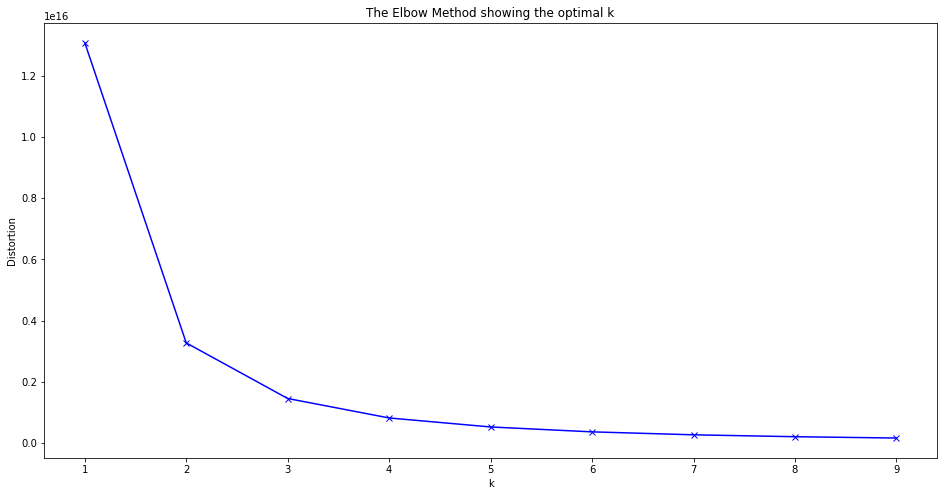

In [14]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X = dataset.drop('Delay', axis=1)
y = dataset['Delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

Accuracy on training set: 0.6534
Accuracy on test set: 0.6540
Feature importances:
[2.31322171e-01 4.94818088e-01 2.06737210e-02 3.15054975e-04
 2.61295675e-03 1.04759628e-02 2.13272010e-01 2.65100350e-02]
[[70762 19180]
 [36807 35066]]
              precision    recall  f1-score   support

           0       0.66      0.79      0.72     89942
           1       0.65      0.49      0.56     71873

    accuracy                           0.65    161815
   macro avg       0.65      0.64      0.64    161815
weighted avg       0.65      0.65      0.65    161815



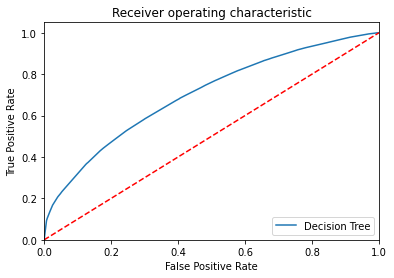

AUC: 0.701


In [16]:
tree = DecisionTreeClassifier(max_depth=6,random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.4f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(tree.score(X_test, y_test)))

#Feature importance rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” 
#The feature importances always sum to 1

print("Feature importances:\n{}".format(tree.feature_importances_))

#Confusion Matrix
y_pred = tree.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# Precision/Recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
DT_roc_auc = roc_auc_score(y_test, tree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

# calculate AUC

print('AUC: %.3f' % metrics.auc(fpr, tpr))


In [17]:
!pip install gradio

In [18]:
pip install fsspec

Note: you may need to restart the kernel to use updated packages.


In [19]:
import gradio

def greet(name):
    return"Hello" + name + '!'
iface = gr.interface(fn=greet, inputs="text", ourputs="text")

iface.launch()

ModuleNotFoundError: No module named 'fsspec.asyn'